In [2]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 696.5/696.5 kB 6.1 MB/s eta 0:00:00


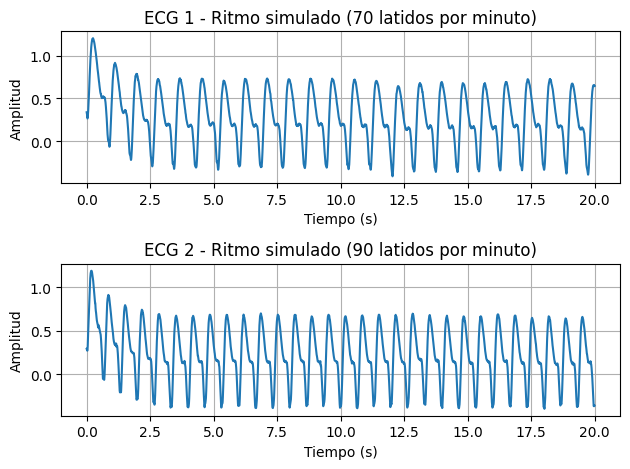

In [17]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

ti1 = np.array((-70, -15, 0, 15, 100))
# a, the amplitude of each spike
ai1 = np.array((1.2, -5, 30, -7.5, 0.75))
# b, the width of each spike
bi1 = np.array((0.25, 0.1, 0.1, 0.1, 0.4))

# Add noise
# ===============
ti1 = np.random.normal(ti1, np.ones(5) * 3)
ai1 = np.random.normal(ai1, np.abs(ai / 5))
bi1 = np.random.normal(bi1, np.abs(bi / 5))

ti2 = np.array((-60, -10, 0, 10, 90))
# a, the amplitude of each spike
ai2 = np.array((2.1, -3, 20, -10, 1))
# b, the width of each spike
bi2 = np.array((1, 0.1, 0.1, 0.5, 1.5))

# Add noise
# ===============
ti2 = np.random.normal(ti2, np.ones(5) * 3)
ai2 = np.random.normal(ai2, np.abs(ai2 / 5))
bi2 = np.random.normal(bi2, np.abs(bi2 / 5))

ecg1 = nk.ecg_simulate(duration=20, sampling_rate=1000, heart_rate=70, method="ecgsyn", ti=ti1, ai=ai2, bi=bi2)
ecg2 = nk.ecg_simulate(duration=20, sampling_rate=1000, heart_rate=90, method="ecgsyn", ti=ti2, ai=ai2, bi=bi2)

# Add noise
# ===============
ti = np.random.normal(ti, np.ones(5) * 3)
ai = np.random.normal(ai, np.abs(ai / 5))
bi = np.random.normal(bi, np.abs(bi / 5))

fs = 1000  # frecuencia de muestreo
n_samples = len(ecg1)
t = np.linspace(0, n_samples / fs, n_samples)


plt.subplot(2, 1, 1)
plt.plot(t, ecg1, label="ECG 1 - 70 bpm")
plt.title("ECG 1 - Ritmo simulado (70 latidos por minuto)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, ecg2, label="ECG 2 - 90 bpm")
plt.title("ECG 2 - Ritmo simulado (90 latidos por minuto)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import skew, kurtosis

# Calcular características estadísticas
mean_ecg = np.mean(ecg1)
median_ecg = np.median(ecg1)
kurtosis_ecg = kurtosis(ecg1)
skewness_ecg = skew(ecg1)
energy_ecg = np.sum(ecg1)

# Imprimir las características
print(f"Mean: {mean_ecg}")
print(f"Median: {median_ecg}")
print(f"Kurtosis: {kurtosis_ecg}")
print(f"Skewness: {skewness_ecg}")
print(f"Energy: {energy_ecg}")

Mean: 0.23899984135724087
Median: 0.1731983281691502
Kurtosis: [ 4.40616552  0.8834477   2.98249554  5.31530949  9.35771805  1.51008228
  2.17544087  7.16783162  3.81908656  0.68353986 -0.18974793  0.10168554]
Skewness: [ 1.60702688  1.27717226  1.29360239  1.43446505 -2.19670631  1.48580105
  1.36571093 -1.84219982  1.00983471  0.60667907  0.88058095  0.8732999 ]
Energy: I       3344.288307
II     -1415.290003
III     2913.324872
aVR     2608.732611
aVL    13413.662404
aVF    -1930.119342
V1       -96.230521
V2     14457.175347
V3      5469.705658
V4     11123.500984
V5      4557.395822
V6      2913.815787
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
